In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


In [6]:
#setting up the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Doing the chat configurations
%matplotlib inline 
pd.set_option('display.max_columns', 500)
sns.set(
    style = 'ticks',
    palette='viridis',
    rc = {'axes.spines.top': False,
          'axes.spines.right': False,
          'axes.titlesize': 16,
          'figure.titlesize': 28,
          'figure.figsize': (12,6)
         })


In [8]:
#Loading the data
train = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')

In [9]:
#We proceed to the summary statistics
#determining the number of rows and columns we use the .shape() method.
print(f'Train shape: {train.shape}, Test shape: {test.shape}')

Train shape: (15304, 12), Test shape: (10204, 11)


In [10]:
#We check for the columns present and the data types.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [12]:
#We check for the summary statistics for the test data.
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10204.0,20405.500000,2945.785407,15304.00,17854.75,20405.50,22956.25,25507.0
age,10204.0,41.920713,21.097956,0.08,26.00,43.50,57.00,82.0
hypertension,10204.0,0.051450,0.220925,0.00,0.00,0.00,0.00,1.0
heart_disease,10204.0,0.021756,0.145894,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,10204.0,89.197766,25.914364,55.12,75.06,85.07,96.75,267.6
bmi,10204.0,28.242351,6.733863,11.50,23.70,27.70,32.00,97.6


In [13]:
train.describe(include = 'object').T

,count,unique,top,freq
gender,15304,3,Female,9446
ever_married,15304,2,Yes,10385
work_type,15304,5,Private,9752
Residence_type,15304,2,Rural,7664
smoking_status,15304,4,never smoked,6281


In [14]:
train.describe(include = 'object').T

,count,unique,top,freq
gender,15304,3,Female,9446
ever_married,15304,2,Yes,10385
work_type,15304,5,Private,9752
Residence_type,15304,2,Rural,7664
smoking_status,15304,4,never smoked,6281


>** Findings** 
* ID should be removed from the dataset from the dataset as is redudant
* Strokes, hypertension and hear heart diseases should be boolean values rather than a numeric
* The target class stroke seems to be imbalanced
* opportunity for some of the numric features to be binned. Age could be ag groups, average glucose levels, bmi
* some of the categorical features seem imbalanced
* Train and test datasets have the same unque values for each of the categorical feature and similar numeric distributions that the underlying distributions are similar

**Target feature**

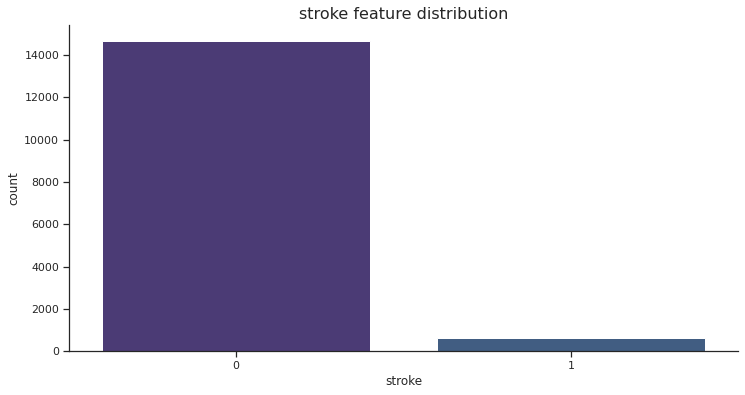

In [15]:
#Visualization of the data
sns.countplot(x=train['stroke'])
plt.title('stroke feature distribution')
plt.show()

Findings
* The target feature stroke in incrediblt imbalanced. This will be taken into consideraion when evaluating the models

**Numerical Feaatures**

In [16]:
#We assign the columns that wil ne used for the indexing.
numeric_cols  = ['age', 'avg_glucose_level', 'bmi']

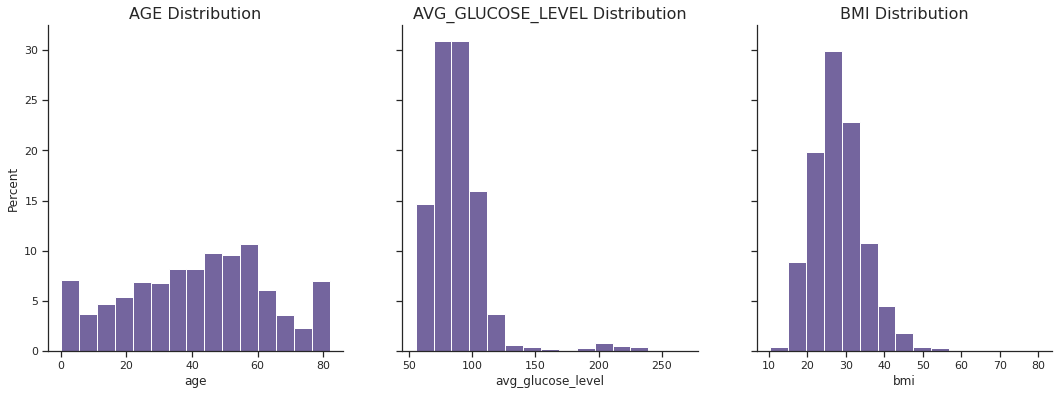

In [17]:
fig, ax = plt.subplots(1,3, figsize=(18,6), sharey=True)

for i, col in enumerate(numeric_cols):
    sns.histplot(train[col],ax=ax[i], bins=15, stat='percent').set(title=f'{col.upper()} Distribution')
    
plt.show()

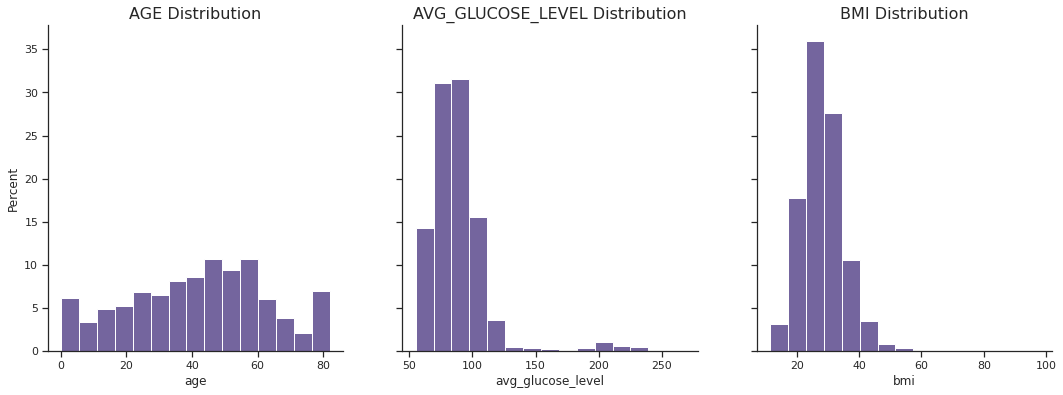

In [18]:
fig, ax = plt.subplots(1,3, figsize=(18,6), sharey=True)

for i, col in enumerate(numeric_cols):
    sns.histplot(test[col],ax=ax[i], bins=15, stat='percent').set(title=f'{col.upper()} Distribution')
    
plt.show()

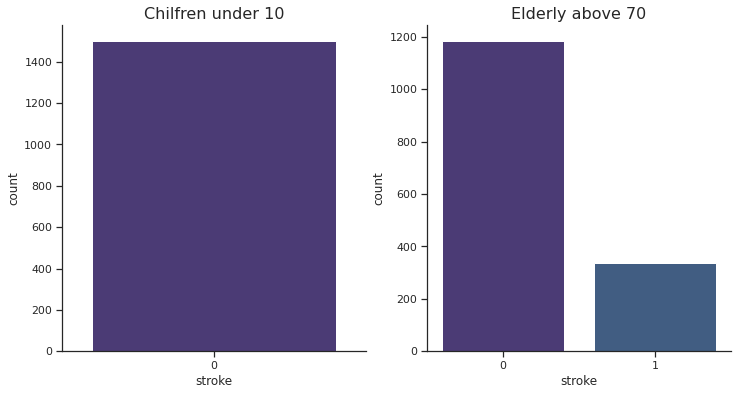

In [19]:
fig, ax = plt.subplots(1,2)
sns.countplot(x = train[train['age']<10]['stroke'], ax = ax[0]).set_title('Chilfren under 10')
sns.countplot(x = train[train['age']>70]['stroke'], ax = ax[1]).set_title('Elderly above 70')
plt.show()

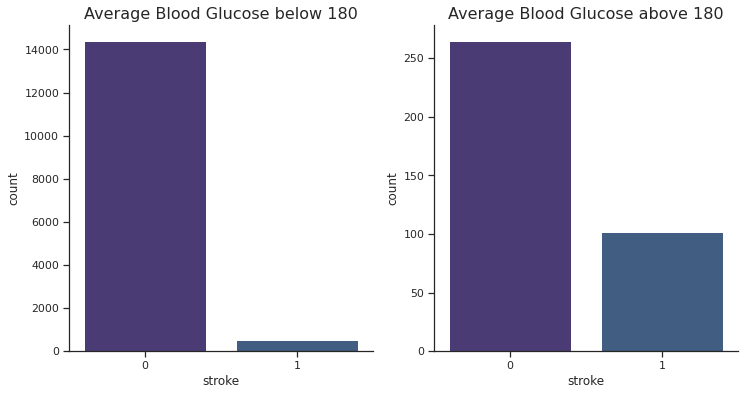

In [20]:
fig, ax = plt.subplots(1,2)

sns.countplot(x=train[train['avg_glucose_level'] < 180]['stroke'], ax=ax[0]).set_title('Average Blood Glucose below 180')
sns.countplot(x=train[train['avg_glucose_level'] >= 180]['stroke'], ax=ax[1]).set_title('Average Blood Glucose above 180')

plt.show()

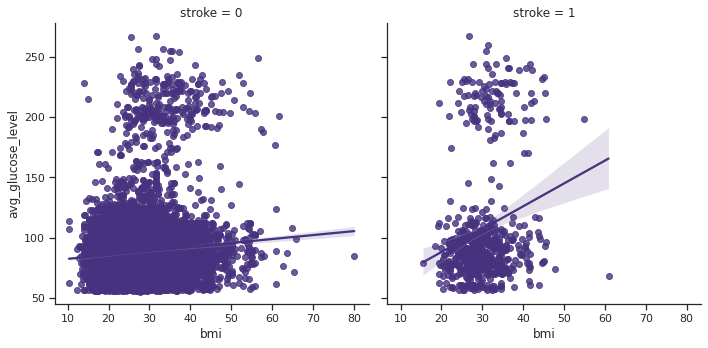

In [21]:
sns.lmplot(
data = train,
    x = 'bmi',
    y = 'avg_glucose_level',
    col = 'stroke'
)
plt.show()

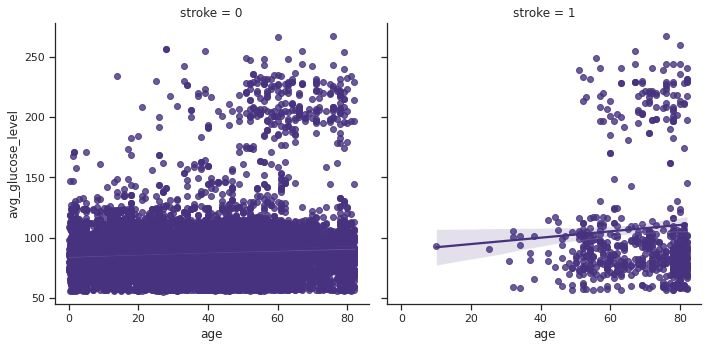

In [22]:
sns.lmplot(
data = train,
    x = 'age',
    y = 'avg_glucose_level',
    col = 'stroke'
)
plt.show()

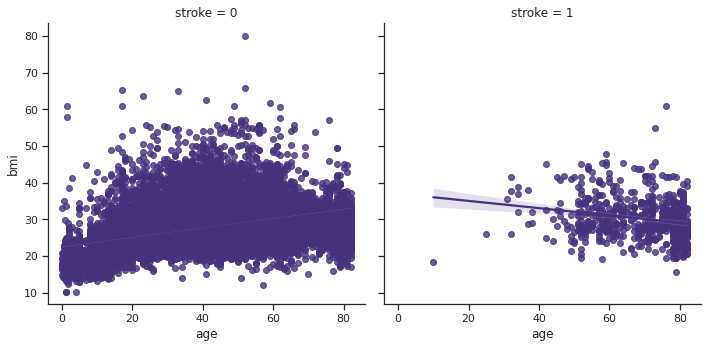

In [23]:
sns.lmplot(
data = train,
    x = 'age',
    y = 'bmi',
    col = 'stroke'
)
plt.show()

Text(0.5, 1.0, 'correlation matrix')

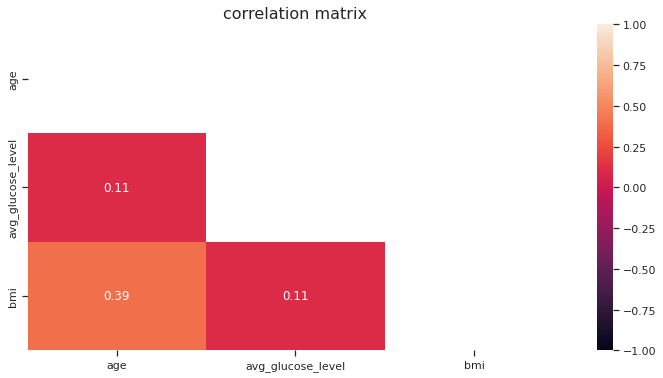

In [24]:
#Finding the correlation of the feature 
corr = train[numeric_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmin = -1 , vmax = 1, annot = True, mask = mask).set_title('correlation matrix')

**Findings**
* Train and test datasets seem simlary distributed although BMI is slightly lower i the test sample
* The age ditribtution seems to overcompesate foor the young people (below 10 year old) and elderly people around 80 years old). Elderly seem to be more likely to have a stroke where young people do not experience stroles at all until aoround 30.
* Where seems  to be another distribution at around 200 glucose level. Those around that level seem are much more lijely to ezperience a stroke than those below.
* Bmi over 30 is as obese, however this not not seem to have a huge impaxt on stroke likelihood ( expecially when to to blood glucose levels and age group)

In [25]:
#sategorical features 
categoric_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']

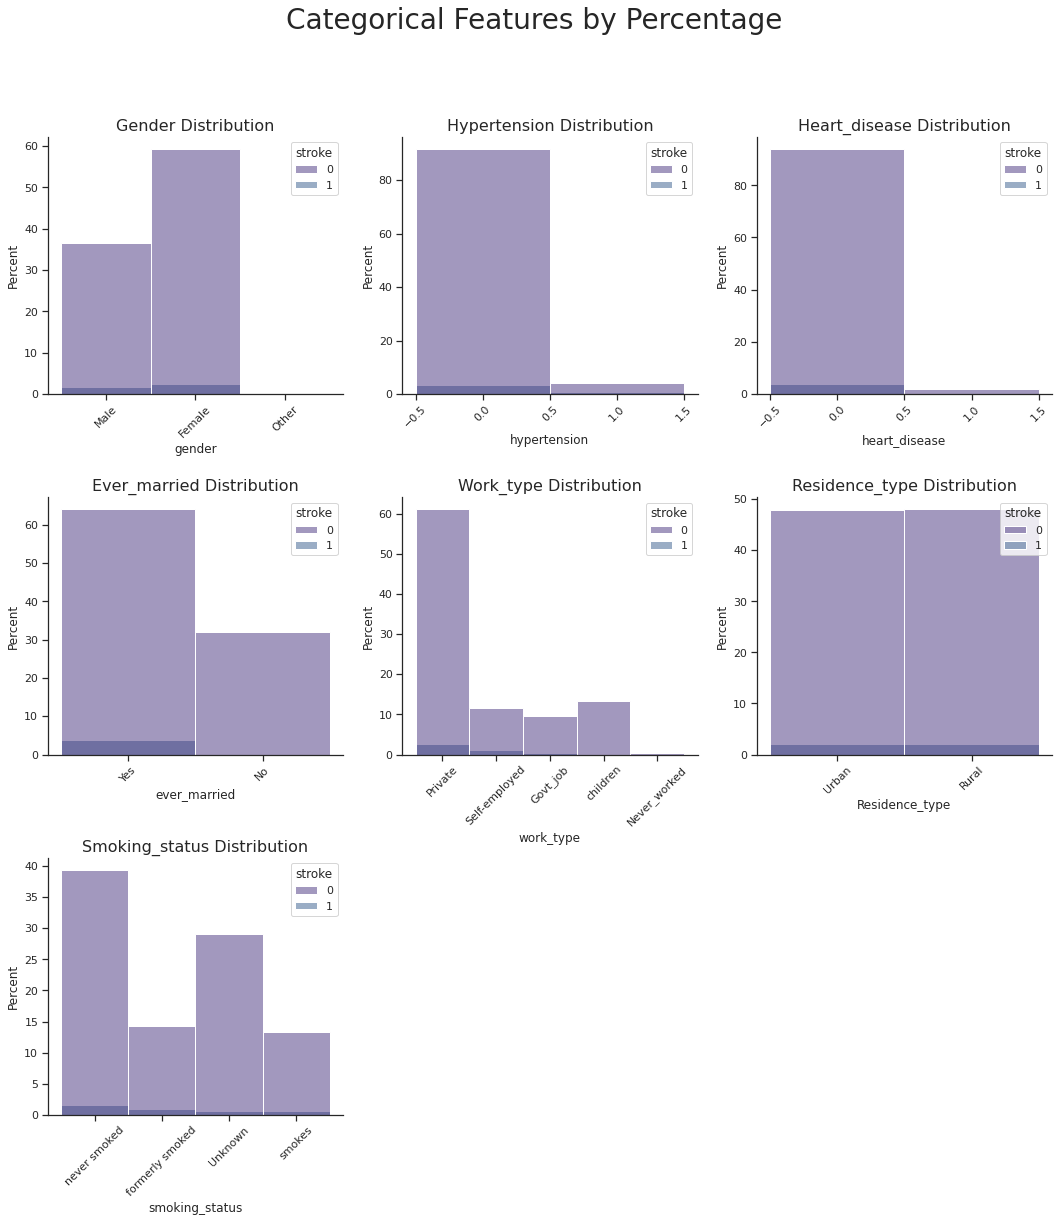

In [26]:
plt.figure(figsize=(18,18))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Categorical Features by Percentage')

for i, col in enumerate(categoric_cols):
    ax = plt.subplot(3, 3, i+1)
    sns.histplot(data=train, 
                 x=col, 
                 hue='stroke', 
                 stat='percent', 
                 discrete=True,
                 ax=ax).set(title=f'{col.capitalize()} Distribution')
    plt.xticks(rotation=45)
    
plt.show()
    

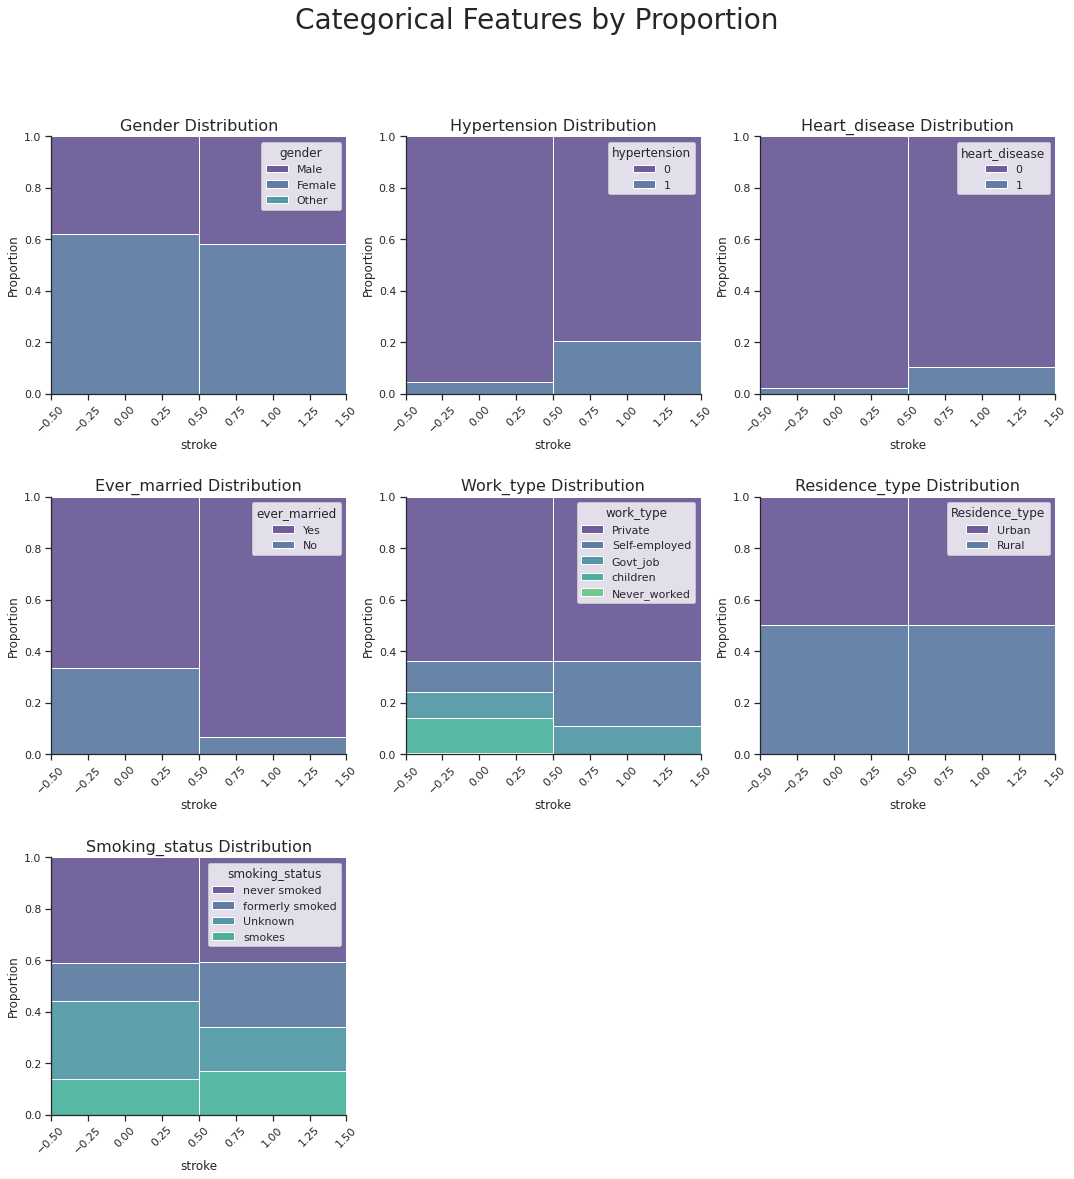

In [27]:
plt.figure(figsize=(18,18))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Categorical Features by Proportion')

for i, col in enumerate(categoric_cols):
    ax = plt.subplot(3, 3, i+1)
    sns.histplot(data=train, 
                 x='stroke', 
                 hue=col, 
                 stat='proportion',
                 multiple='fill',
                 discrete=True,
                 ax=ax).set(title=f'{col.capitalize()} Distribution')
    plt.xticks(rotation=45)
    
plt.show()

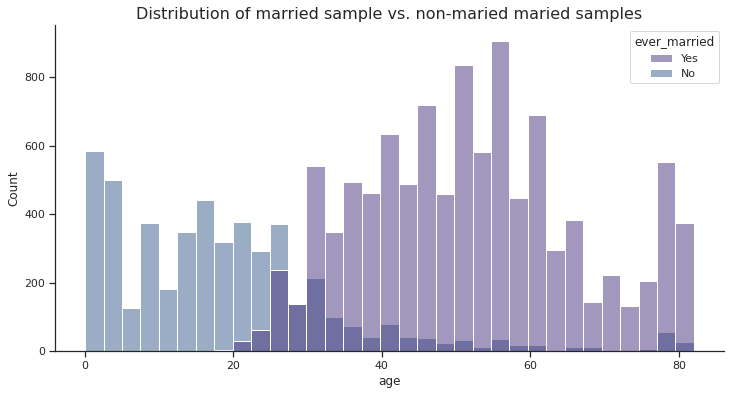

In [31]:
sns.histplot(
data = train,
x = 'age',
hue = 'ever_married').set(title = 'Distribution of married sample vs. non-maried maried samples')
plt.show()